In [1]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from src import *

In [2]:
# Parameters
D = 8
window_size = 20
total_samples= 10000
train_samples= 9000

# 1. Data
X = generate_synthetic_data(T=total_samples, D=D)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train = sliding_windows(X_scaled[train_samples:], window_size)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)


In [3]:
print(X_train_tensor.shape) # (batch, seq_len, features)

torch.Size([980, 20, 8])


In [4]:
# 2. Model (choose one)
# model = LSTMAutoencoder(input_dim=D, hidden_dim=4)
# model = CNNAutoencoder(input_dim=D, window_size=window_size)
model = FlattenedAutoencoder(d=D, t=window_size,n1=5)



In [5]:
torch.utils.data.DataLoader(X_train_tensor, batch_size=32, shuffle=True).batch_size

32

In [6]:
print(X_train_tensor[0].shape)

torch.Size([20, 8])


In [7]:
# 3. Train
train_autoencoder(model, X_train_tensor, epochs=100)

# 4. Inference
scores = online_inference(model, X, scaler, window_size)


Epoch 1, Loss: 0.0394
Epoch 2, Loss: 0.0378
Epoch 3, Loss: 0.0360
Epoch 4, Loss: 0.0341
Epoch 5, Loss: 0.0323
Epoch 6, Loss: 0.0309
Epoch 7, Loss: 0.0297
Epoch 8, Loss: 0.0288
Epoch 9, Loss: 0.0280
Epoch 10, Loss: 0.0272
Epoch 11, Loss: 0.0266
Epoch 12, Loss: 0.0261
Epoch 13, Loss: 0.0257
Epoch 14, Loss: 0.0254
Epoch 15, Loss: 0.0251
Epoch 16, Loss: 0.0248
Epoch 17, Loss: 0.0245
Epoch 18, Loss: 0.0242
Epoch 19, Loss: 0.0240
Epoch 20, Loss: 0.0239
Epoch 21, Loss: 0.0237
Epoch 22, Loss: 0.0236
Epoch 23, Loss: 0.0234
Epoch 24, Loss: 0.0232
Epoch 25, Loss: 0.0231
Epoch 26, Loss: 0.0230
Epoch 27, Loss: 0.0228
Epoch 28, Loss: 0.0227
Epoch 29, Loss: 0.0226
Epoch 30, Loss: 0.0225
Epoch 31, Loss: 0.0224
Epoch 32, Loss: 0.0224
Epoch 33, Loss: 0.0223
Epoch 34, Loss: 0.0222
Epoch 35, Loss: 0.0222
Epoch 36, Loss: 0.0221
Epoch 37, Loss: 0.0221
Epoch 38, Loss: 0.0221
Epoch 39, Loss: 0.0221
Epoch 40, Loss: 0.0220
Epoch 41, Loss: 0.0220
Epoch 42, Loss: 0.0220
Epoch 43, Loss: 0.0219
Epoch 44, Loss: 0.02

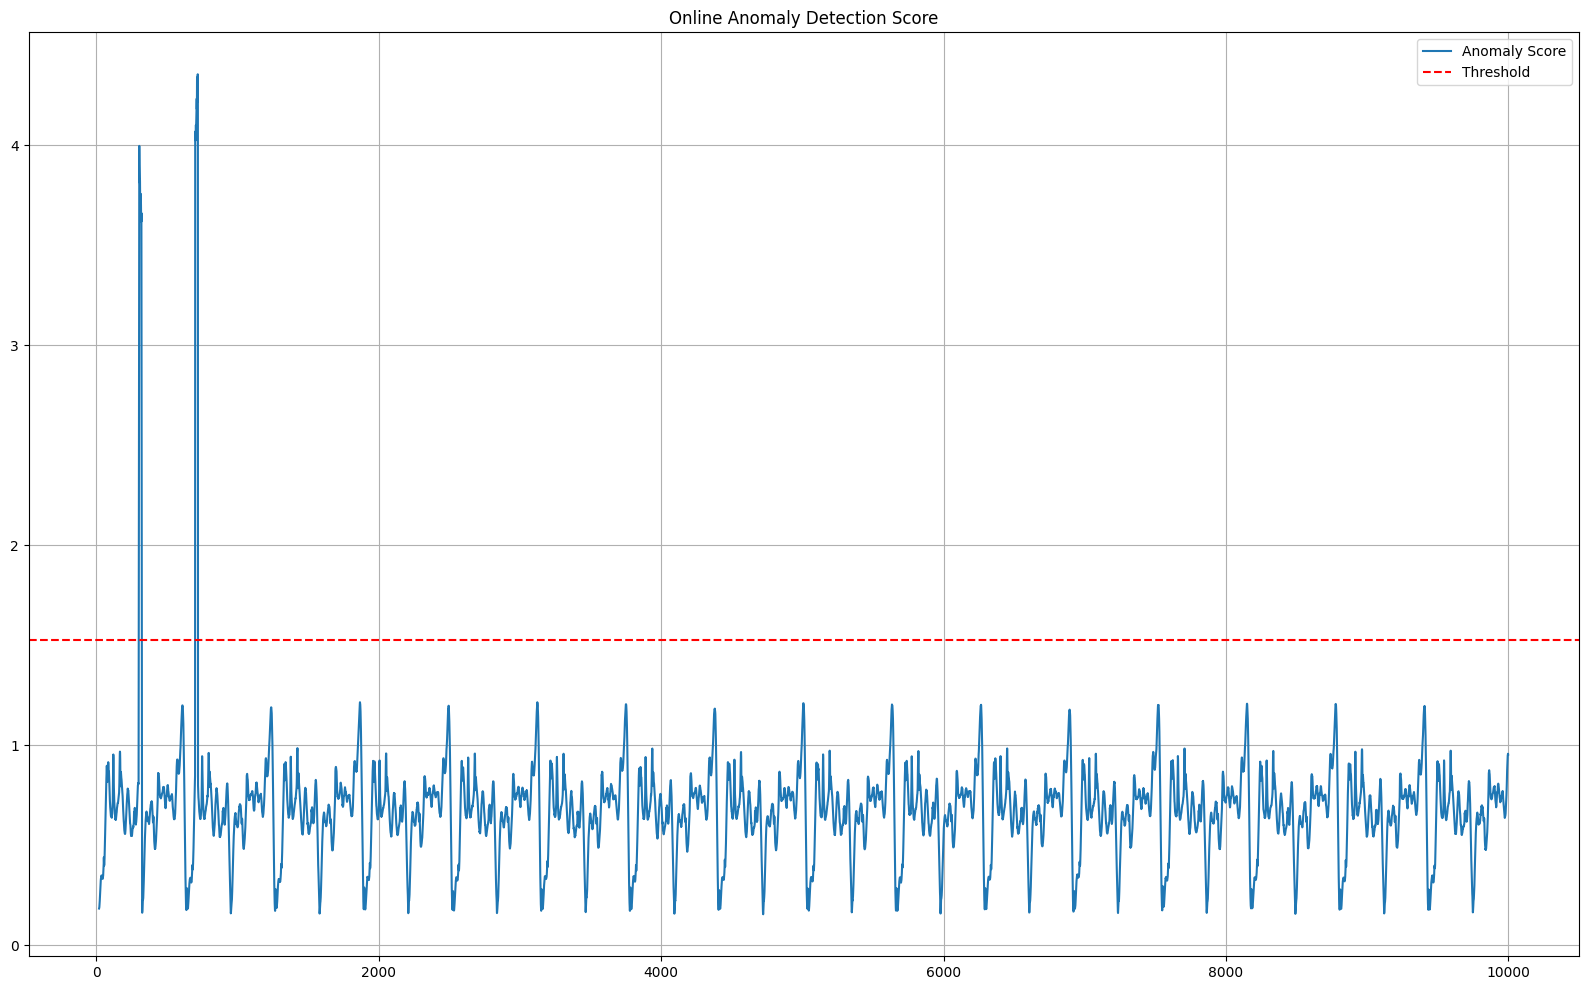

In [8]:
# 5. Plot
plt.figure(figsize=(20,12))
plt.plot(scores, label='Anomaly Score')
plt.axhline(np.nanmean(scores) + 3*np.nanstd(scores), color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid()
plt.title('Online Anomaly Detection Score')
plt.show()


In [12]:
# After calling model on a window:
window_size = 20
window_start = 0
x_window = X[window_start:window_start + window_size]
x_window_scaled = scaler.transform(x_window)
x_input = torch.tensor(x_window_scaled, dtype=torch.float32).unsqueeze(0)
print(x_input.shape)


torch.Size([1, 20, 8])


In [14]:
model(x_input).shape

torch.Size([1, 20, 8])

In [ ]:
with torch.no_grad():
    x_output = model(x_input).squeeze(0).numpy()

# Inverse scale if needed
x_original = scaler.inverse_transform(x_window_scaled)
x_reconstructed = scaler.inverse_transform(x_output)

plot_reconstruction(x_original, x_reconstructed, window_start=window_start)
